# Programming Exercise 2: Logistic Regression 
## Machine Learning
## Introduction
In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

Files included in this exercise:
* `ex2.ipynb` - Python script that steps you through the exercise  .
* `ex2_data/ex2data1.txt`, `ex2_data/ex2data2.txt` - Data for the exercise.   
* `ex2_utils.py` - All necessary functions, classes and solutions for the exercise.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ex2_utils import *
import scipy.optimize as opt

## 1. Logistic Regression  
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part of <b>ex2.ipynb</b>, the code will load the data and display it on a 2-dimensional plot by calling the function <b>load</b>, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

You will now complete the code in <b>plot_data</b> so that it displays a figure like <i>Figure 1</i>, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples...


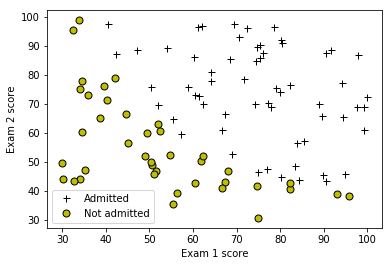

	Figure 1: Scatter plot of training data


In [2]:
# Load Data
# The first two columns contains the exam scores and the third column contains the label.
data = load('ex2_data/ex2data1.txt')
X = data[:,:2]
y = data[:,-1:]

# ==================== Part 1: Plotting ====================
# We start the exercise by first plotting the data to understand the problem we are working with.%% Load Data
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples...')
_ = plot_data(X,y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(('Admitted', 'Not admitted'))
plt.show()
print('\tFigure 1: Scatter plot of training data')

### 1.2 Implementation
#### 1.2.1 Sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as: $h_\theta(x)=g(\theta^Tx)$  
where function g is the sigmoid function. The sigmoid function is defined as: $g(z)={1\over 1+e^{-z}}$  
Your first step is to implement this function <b>sigmoid</b> so it can be called by the rest of your program. When you are finished, try testing a few values by calling <b>sigmoid(x)</b>. <u>For large positive values of $x$, the sigmoid should be close to $1$, while for large negative values, the sigmoid should be close to $0$</u>. Evaluating <b>sigmoid(0)</b> should give you exactly $0.5$. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [3]:
sigmoid(0)

0.5

### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression. Recall that the cost function in logistic regression is

$$J(\theta) =  \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)}) - (1-y^{(i)})\log(1 - h_\theta(x^{(i)}))]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1, . . . , n$) is defined as follows:
<center>$$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$</center>

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta{(x)}$. Once you are done,  call your <b>CostFunc</b> using the initial parameters of $\theta$. You should see that the cost is about $0.693$.

In [4]:
#  ============ Part 2: Compute Cost and Gradient ============
# Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = X.shape
X = np.append(np.ones((m,1)), X, axis=1)

# Initialize fitting parameters
initial_theta = np.zeros((n+1, 1))

In [5]:
# Compute and display initial cost and gradient
cost, grad = CostFunc(X, y).cost(initial_theta), CostFunc(X, y).gradient(initial_theta)

print('Cost at initial theta (zeros): %0.3f' %cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):\n%0.4f \n%0.4f \n%0.4f' %tuple(grad[:]))
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
-0.1000 
-12.0092 
-11.2628
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [6]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
#cost, grad = costFunction(test_theta, X, y)
cost, grad = CostFunc(X, y).cost(test_theta), CostFunc(X, y).gradient(test_theta)
print('Cost at test theta : %0.3f' %cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta (zeros):\n%0.3f \n%0.3f \n%0.3f' %tuple(grad[:]))
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta : 0.218
Expected cost (approx): 0.218
Gradient at test theta (zeros):
0.043 
2.566 
2.647
Expected gradients (approx):
 0.043
 2.566
 2.647



### 1.2.3 Learning parameters using `scipy.optimize.fmin_tnc`
In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use an <b>scipy.optimize</b>'s built-in function called <b>fmin_tnc</b>. <b>fimin_tnc</b> is an optimization solver that finds the minimum of an unconstrained 2 function. For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$. Concretely, you are going to use <b>fmin_tnc</b> to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of $X$ and $y$ values). You will pass to <b>fmin_tnc</b> the following inputs: 
* The initial values of the parameters we are trying to optimize.
* A function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to θ for the dataset $(X, y)$.

If you have completed the <b>CostFunc</b> correctly, fminunc will converge on the right optimization parameters and return the final values of the cost and $\theta$. Once <b>fmin_tnc</b> completes, call <b>CostFunc</b> function using the optimal parameters of $\theta$.You should see that the cost is about $0.203$.

This final $\theta$ value will then be used to plot the decision boundary on the training data, resulting in a figure similar to <b>Figure 2</b>. We also encourage you to look at the code in <b>plot_decision_boundary</b> to see how to plot such a boundary using the $\theta$ values.

In [7]:
f = CostFunc(X, y)
result = opt.fmin_tnc(func=f.cost, x0=initial_theta, fprime=f.gradient) 
theta_opt = result[0]
cost_opt = f.cost(theta_opt)

print('Cost at theta found by fminunc: %0.3f' %cost_opt)
print('Expected cost (approx): 0.203\n')
print('theta: %0.3f  %0.3f  %0.3f' %tuple(theta_opt[:]))
print('Expected theta (approx): -25.161  0.206  0.201')

Cost at theta found by fminunc: 0.203
Expected cost (approx): 0.203

theta: -25.161  0.206  0.201
Expected theta (approx): -25.161  0.206  0.201


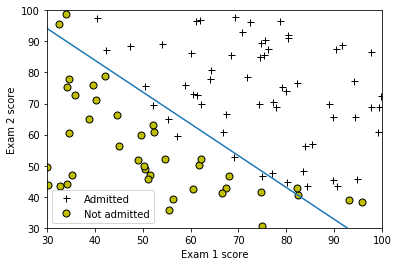

	Figure 2: Training data with Decision boundary


In [8]:
# Plot Boundary
fig = plot_data(X[:,1:], y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(('Admitted', 'Not admitted'))
plot_decision_boundary(theta_opt, X, y)
print('\tFigure 2: Training data with Decision boundary')

### 1.2.4 Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of $0.776$.  

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in <b>predict</b>. The <b>predict</b> function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$.  

After you have completed the code, the script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.</div></div>

In [9]:
prob = sigmoid(np.dot(np.array([1, 45, 85]),theta_opt))
print('For a student with scores 45 and 85, we predict an admission probability of %0.3f' %prob)
print('Expected value: 0.775 +/- 0.002');

# Compute accuracy on our training set
p,acc = predict(theta_opt, X, y)

print('\nTrain Accuracy: %0.1f' %acc)
print('Expected accuracy (approx): 89.0\n')

For a student with scores 45 and 85, we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.0
Expected accuracy (approx): 89.0



## 2. Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data
Similar to the previous parts of this exercise, <b>plot_data</b> is used to generate a figure like <b>Figure 3</b>, where the axes are the two test scores, and the positive ($y = 1$, accepted) and negative ($y = 0$, rejected) examples are shown with different markers.

<b>Figure 3</b> shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

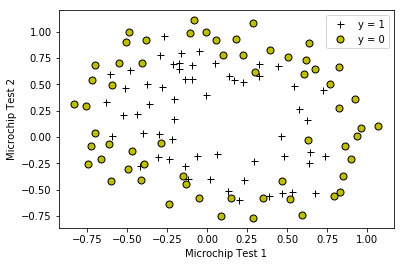

	Figure 3: Plot of training data


In [10]:
data = load('ex2_data/ex2data2.txt')
X = data[:,:2]
y = data[:,-1:]

_ = plot_data(X,y)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(('y = 1', 'y = 0'))
plt.show()
print('\tFigure 3: Plot of training data')

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point. The function <b>map_feature</b> will map the features into all polynomial terms of x 1 and x 2 up to the sixth power.

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. 

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [11]:
# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
X = map_feature(X[:,:1], X[:,-1:])

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
lb = 1

In [12]:
# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = CostFuncReg(X, y, lb).cost(initial_theta), CostFuncReg(X, y, lb).gradient(initial_theta)

print('Cost at initial theta (zeros): %0.3f' %cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:')
print('%0.4f  %0.4f  %0.4f  %0.4f  %0.4f' %tuple(grad[:5]))
print('\nExpected gradients (approx) - first five values only')
print('0.0085  0.0188  0.0001  0.0503  0.0115')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:
0.0085  0.0188  0.0001  0.0503  0.0115

Expected gradients (approx) - first five values only
0.0085  0.0188  0.0001  0.0503  0.0115


In [13]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],1))
t = np.ones((28,1))
cost, grad = CostFuncReg(X, y, 10).cost(test_theta), CostFuncReg(X, y, 10).gradient(test_theta)

print('Cost at test theta (with lambda = 10): %0.3f' %cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta  - first five values only:')
print('%0.4f  %0.4f  %0.4f  %0.4f  %0.4f' %tuple(grad[:5]))
print('\nExpected gradients (approx) - first five values only')
print('0.3460  0.1614  0.1948  0.2269  0.0922')

Cost at test theta (with lambda = 10): 3.165
Expected cost (approx): 3.16

Gradient at test theta  - first five values only:
0.3460  0.1614  0.1948  0.2269  0.0922

Expected gradients (approx) - first five values only
0.3460  0.1614  0.1948  0.2269  0.0922



#### 2.3.1 Learning parameters using `fmin_tnc`
Similar to the previous parts, you will use <b>fmin_tnc</b> to learn the optimal parameters $\theta$. If you have completed the cost and gradient for regularized logistic regression <b>CostFuncReg</b> correctly, you should be able to step through the next part to learn the parameters $\theta$ using <b>fmin_tnc</b>.

In [14]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1 (you should vary this)
lb = 1
f = CostFuncReg(X, y, lb)
result = opt.fmin_tnc(func=f.cost, x0=initial_theta, fprime=f.gradient)
theta = result[0]

### 2.4 Plotting the decision boundary
To help you visualize the model learned by this classifier, the function <b>plot_decision_boundary</b> plots the (non-linear) decision boundary that separates the positive and negative examples. In <b>plot_decision_boundary</b>, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from $y = 0$ to $y = 1$. After learning the parameters $\theta$, the next step will plot a decision boundary similar to <b>Figure 4<b>.

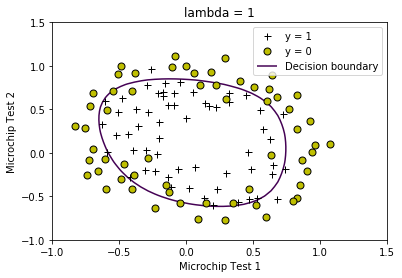

Figure 4: Training data with decision boundary (λ = 1)


In [15]:
# Plot Boundary
fig = plot_data(X[:,1:],y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = %i' %lb)
plot_decision_boundary(theta, X, y)
plt.legend(('y = 1', 'y = 0', 'Decision boundary'))
plt.show()
print('Figure 4: Training data with decision boundary (λ = 1)')

### 2.5 Optional exercises
In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents over-fitting.

Notice the changes in the decision boundary as you vary $\lambda$.
* With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data (<b>Figure 5</b>). This is not a good decision boundary: for example, it predicts that a point at $x = (-0.25, 1.5)$ is accepted $(y = 1)$, which seems to be an incorrect decision given the training set.
<img src="l0.png">
<center><b>Figure 5: No regularization (Overfitting) (λ = 0)</b></center>  

* With a larger $\lambda$, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if $\lambda$ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data (<b>Figure 6</b>).

<img src="l100.png">

<center><b>Figure 6: Too much regularization (Underfitting) (λ = 100)</b></center>

In [16]:
# Compute accuracy on our training set

p,acc = predict(theta, X, y)
print('Train Accuracy: %0.3f\n' %acc)
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')

Train Accuracy: 83.051

Expected accuracy (with lambda = 1): 83.1 (approx)

